# Table of Contents
1. [Exploratory Analysis and Data Cleaning](#exploratory)
2. [Database Creation-SQLite](#sql_db)
3. [Query- Conditional 5Y IR](#sql_query)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from IPython.display import display
sns.set()

<a id="exploratory"></a>

## Exploratory Analysis and Data Cleaning

In [2]:
p = Path.cwd()/ 'data'
print(p)
fund_1 = pd.read_csv(p/'Fund Data (1).csv')
fund_2 = pd.read_csv(p/'Fund Data (2).csv')

/Users/brjax/Documents/BNY/data


In [3]:
#################### Evaluate file 1 #####################

#fund_1.head()
fund_1.info()
print(fund_1["SHARECLASS_ID"].nunique())
fund_1[fund_1.duplicated()]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7062 entries, 0 to 7061
Data columns (total 18 columns):
SHARECLASS_ID               7062 non-null object
SHARECLASS_NAME             7062 non-null object
FUND_NAME                   7062 non-null object
SHARE_CLASS_COUNTER         7062 non-null int64
FUND_FAMILY_NAME            7062 non-null object
MSTAR_CATEGORY_NAME         7062 non-null object
MSTAR_GLOB_CATEGORY_NAME    7062 non-null object
MSTAR_BROAD_CATEGORY        7062 non-null object
COMMON_SOURCE_SYSTEM        7062 non-null object
RETURN_NET_1M               7062 non-null object
RETURN_NET_2M               7062 non-null object
RETURN_NET_3M               7062 non-null object
RETURN_NET_6M               7062 non-null float64
RETURN_NET_1Y               7062 non-null float64
RETURN_NET_2Y               7062 non-null float64
RETURN_NET_3Y               7062 non-null float64
RETURN_NET_4Y               7062 non-null float64
RETURN_NET_5Y               7062 non-null float64
dtypes

SHARECLASS_ID  \
477  F0GBR04L7T                       
478  F0GBR04L7T                       
479  F0GBR04L7T                       

                                       SHARECLASS_NAME  \
477  BNY Mellon Global Funds PLC - BNY Mellon S&P 5...   
478  BNY Mellon Global Funds PLC - BNY Mellon S&P 5...   
479  BNY Mellon Global Funds PLC - BNY Mellon S&P 5...   

                                             FUND_NAME  SHARE_CLASS_COUNTER  \
477  BNY Mellon Global Funds PLC - BNY Mellon S&P 5...                    1   
478  BNY Mellon Global Funds PLC - BNY Mellon S&P 5...                    1   
479  BNY Mellon Global Funds PLC - BNY Mellon S&P 5...                    1   

         FUND_FAMILY_NAME        MSTAR_CATEGORY_NAME  \
477  BNY Mellon Global Ma  US Large-Cap Blend Equity   
478  BNY Mellon Global Ma  US Large-Cap Blend Equity   
479  BNY Mellon Global Ma  US Large-Cap Blend Equity   

      MSTAR_GLOB_CATEGORY_NAME MSTAR_BROAD_CATEGORY COMMON_SOURCE_SYSTEM  \
477  US Equity Large Cap Blend               Equity               EUROPE   
478  US Equity Large Cap Blend               Equity               EUROPE   
479  US Equity Large Cap Blend               Equity               EUROPE   

    RETURN_NET_1M RETURN_NET_2M RETURN_NET_3M  RETURN_NET_6M  RETURN_NET_1Y  \
477          3.73           6.5          6.01           1.16          14.56   
478          3.73           6.5          6.01           1.16          14.56   
479          3.73           6.5          6.01           1.16          14.56   

     RETURN_NET_2Y  RETURN_NET_3Y  RETURN_NET_4Y  RETURN_NET_5Y  
477           8.48          11.44          14.65          15.55  
478           8.48          11.44          14.65          15.55  
479           8.48          11.44          14.65          15.55

In [4]:
fund_1.drop_duplicates(inplace=True)
# convert numerical columns classified as objects to float
cols = ['RETURN_NET_1M','RETURN_NET_2M','RETURN_NET_3M']
fund_1[cols]=fund_1[cols].apply(pd.to_numeric, errors='coerce')
fund_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7059 entries, 0 to 7061
Data columns (total 18 columns):
SHARECLASS_ID               7059 non-null object
SHARECLASS_NAME             7059 non-null object
FUND_NAME                   7059 non-null object
SHARE_CLASS_COUNTER         7059 non-null int64
FUND_FAMILY_NAME            7059 non-null object
MSTAR_CATEGORY_NAME         7059 non-null object
MSTAR_GLOB_CATEGORY_NAME    7059 non-null object
MSTAR_BROAD_CATEGORY        7059 non-null object
COMMON_SOURCE_SYSTEM        7059 non-null object
RETURN_NET_1M               7044 non-null float64
RETURN_NET_2M               7044 non-null float64
RETURN_NET_3M               7044 non-null float64
RETURN_NET_6M               7059 non-null float64
RETURN_NET_1Y               7059 non-null float64
RETURN_NET_2Y               7059 non-null float64
RETURN_NET_3Y               7059 non-null float64
RETURN_NET_4Y               7059 non-null float64
RETURN_NET_5Y               7059 non-null float64
dty

In [5]:
#display(fund_1.describe())
fund_1.isnull().sum()

SHARECLASS_ID                0
SHARECLASS_NAME              0
FUND_NAME                    0
SHARE_CLASS_COUNTER          0
FUND_FAMILY_NAME             0
MSTAR_CATEGORY_NAME          0
MSTAR_GLOB_CATEGORY_NAME     0
MSTAR_BROAD_CATEGORY         0
COMMON_SOURCE_SYSTEM         0
RETURN_NET_1M               15
RETURN_NET_2M               15
RETURN_NET_3M               15
RETURN_NET_6M                0
RETURN_NET_1Y                0
RETURN_NET_2Y                0
RETURN_NET_3Y                0
RETURN_NET_4Y                0
RETURN_NET_5Y                0
dtype: int64

In [6]:
fund_1[fund_1.isna().any(axis=1)]

SHARECLASS_ID  \
4685  FOUSA068X3                       
4686  FOUSA068X4                       
4688  FOUSA068X5                       
4695  FOUSA06VOC                       
4696  FOUSA06VOD                       
4698  FOUSA06VOE                       
4699  FOUSA06VOF                       
4700  FOUSA06VOH                       
4701  FOUSA06VOI                       
4702  FOUSA06VOJ                       
4704  FOUSA06VOK                       
4705  FOUSA06VOL                       
4706  FOUSA06VOM                       
4713  FOUSA0861F                       
5123  F00000LOZ5                       

                                        SHARECLASS_NAME  \
4685                       SPDR S&P Emerging Europe ETF   
4686                SPDR S&P Emerging Latin America ETF   
4688         SPDR S&P Emerging Middle East & Africa ETF   
4695  SPDR S&P International Consumer Discretionary ...   
4696  SPDR S&P International Consumer Staples Sector...   
4698           SPDR S&P International Energy Sector ETF   
4699        SPDR S&P International Financial Sector ETF   
4700      SPDR S&P International Health Care Sector ETF   
4701       SPDR S&P International Industrial Sector ETF   
4702        SPDR S&P International Materials Sector ETF   
4704       SPDR S&P International Technology Sector ETF   
4705  SPDR S&P International Telecommunications Sect...   
4706        SPDR S&P International Utilities Sector ETF   
4713                                SPDR S&P Russia ETF   
5123  Swisscanto (CH) Index Fund V - Swisscanto (CH)...   

                                              FUND_NAME  SHARE_CLASS_COUNTER  \
4685                         SPDRS&PEmerging Europe ETF                    1   
4686                  SPDRS&PEmerging Latin America ETF                    1   
4688           SPDRS&PEmerging Middle East & Africa ETF                    1   
4695  SPDRS&PInternational Consumer Discretionary Se...                    1   
4696   SPDRS&PInternational Consumer Staples Sector ETF                    1   
4698             SPDRS&PInternational Energy Sector ETF                    1   
4699          SPDRS&PInternational Financial Sector ETF                    1   
4700        SPDRS&PInternational Health Care Sector ETF                    1   
4701         SPDRS&PInternational Industrial Sector ETF                    1   
4702          SPDRS&PInternational Materials Sector ETF                    1   
4704         SPDRS&PInternational Technology Sector ETF                    1   
4705  SPDRS&PInternational Telecommunications Sector...                    1   
4706          SPDRS&PInternational Utilities Sector ETF                    1   
4713                                  SPDRS&PRussia ETF                    1   
5123  Swisscanto (CH) Index Fund V - Swisscanto (CH)...                    1   

          FUND_FAMILY_NAME   MSTAR_CATEGORY_NAME  \
4685  SPDR State Street Gl  Miscellaneous Region   
4686  SPDR State Street Gl   Latin America Stock   
4688  SPDR State Street Gl  Miscellaneous Region   
4695  SPDR State Street Gl     Consumer Cyclical   
4696  SPDR State Street Gl    Consumer Defensive   
4698  SPDR State Street Gl         Equity Energy   
4699  SPDR State Street Gl             Financial   
4700  SPDR State Street Gl                Health   
4701  SPDR State Street Gl           Industrials   
4702  SPDR State Street Gl     Natural Resources   
4704  SPDR State Street Gl            Technology   
4705  SPDR State Street Gl        Communications   
4706  SPDR State Street Gl             Utilities   
4713  SPDR State Street Gl  Miscellaneous Region   
5123  Swisscanto Fondsleit           Global Bond   

                     MSTAR_GLOB_CATEGORY_NAME MSTAR_BROAD_CATEGORY  \
4685                             Other Equity               Equity   
4686                     Latin America Equity               Equity   
4688                             Other Equity               Equity   
4695  Consumer Goods & Services Sector Equi

In [7]:
# look into unique values
print(fund_1["MSTAR_BROAD_CATEGORY"].unique(),
fund_1["COMMON_SOURCE_SYSTEM"].unique())

['EQUITY' 'Equity' 'Fixed Income' 'Alternative' 'Allocation'
 'Bonds/Fixed Income' 'Equity/Stocks'] ['FO_USA' 'ASIA-PACIFIC' 'FE_ALL' 'EUROPE' 'AUS-NZL' 'LATIN-AMERICA' 'GBR'
 'CAN' 'CARIBBEAN' 'AFRICA' 'MIDDLE-EAST']


In [8]:
# consolidate redundant categories
fund_1["MSTAR_BROAD_CATEGORY"].replace(['EQUITY','Equity/Stocks'],'Equity',inplace= True)
fund_1["MSTAR_BROAD_CATEGORY"].replace('Bonds/Fixed Income','Fixed Income',inplace= True)

In [9]:
fund_1.describe(include='all')

SHARECLASS_ID                      SHARECLASS_NAME  \
count                             7059                                 7059   
unique                            7059                                 7059   
top     F000000MZY                      Commerzbank ETN 3x DJIAF Daily Long   
freq                                 1                                    1   
mean                               NaN                                  NaN   
std                                NaN                                  NaN   
min                                NaN                                  NaN   
25%                                NaN                                  NaN   
50%                                NaN                                  NaN   
75%                                NaN                                  NaN   
max                                NaN                                  NaN   

                                FUND_NAME  SHARE_CLASS_COUNTER  \
count                                7059          7059.000000   
unique                               4858                  NaN   
top     ANZ Vanguard Australian Shr Index                  NaN   
freq                                   16                  NaN   
mean                                  NaN             1.710157   
std                                   NaN             1.485310   
min                                   NaN             1.000000   
25%                                   NaN             1.000000   
50%                                   NaN             1.000000   
75%                                   NaN             2.000000   
max                                   NaN            16.000000   

            FUND_FAMILY_NAME        MSTAR_CATEGORY_NAME  \
count                   7059                       7059   
unique                   505                        440   
top     iShares               US Large-Cap Blend Equity   
freq                     343                        218   
mean                     NaN                        NaN   
std                      NaN                        NaN   
min                      NaN                        NaN   
25%                      NaN                        NaN   
50%                      NaN                        NaN   
75%                      NaN                        NaN   
max                      NaN                        NaN   

       MSTAR_GLOB_CATEGORY_NAME MSTAR_BROAD_CATEGORY COMMON_SOURCE_SYSTEM  \
count                      7059                 7059                 7059   
unique                       83                    4                   11   
top               Trading Tools               Equity               FE_ALL   
freq                        694                 4641                 2775   
mean                        NaN                  NaN                  NaN   
std                         NaN                  NaN                  NaN   
min                         NaN                  NaN                  NaN   
25%                         NaN                  NaN                  NaN   
50%                         NaN                  NaN                  NaN   
75%                         NaN                  NaN                  NaN   
max                         NaN                  NaN                  NaN   

        RETURN_NET_1M  RETURN_NET_2M  RETURN_NET_3M  RETURN_NET_6M  \
count     7044.000000    7044.000000    7044.000000    7059.000000   
unique            NaN            NaN            NaN            NaN   
top               NaN            NaN            NaN            NaN   
freq              NaN            NaN            NaN            NaN   
mean         2.062219       3.474475       3.762835       6.095098   
std          3.910265       6.747818       6.460851      10.918910   
min        -52.450000     -63.640000     -75.500000     -95.530000   
25%          0.480000       0.590000       1.280000       1.550000   
50%          1.9800

In [10]:
# evaluate 1Y returns and sort by highest 1Y return
fund_1.boxplot(column='RETURN_NET_1Y', return_type='axes')
cols =["SHARECLASS_ID","SHARECLASS_NAME","MSTAR_BROAD_CATEGORY","RETURN_NET_1Y", "RETURN_NET_3Y"]
fund_1[cols].sort_values(by='RETURN_NET_1Y', ascending=False).head(10)

SHARECLASS_ID  \
394   F0GBR06SU1                       
1037  F00000PQUZ                       
1026  F00000PQV0                       
1100  F00000PT9D                       
1482  F00000GY41                       
1091  F00000PU4Z                       
5968  F00000LKV9                       
4147  F00000N3H3                       
576   F00000O2LH                       
1288  F00000NIU7                       

                                        SHARECLASS_NAME MSTAR_BROAD_CATEGORY  \
394                                         Avanza Zero               Equity   
1037            Commerzbank ETN -2x VSTOXXF Daily Short          Alternative   
1026            Commerzbank ETN -1x VSTOXXF Daily Short          Alternative   
1100              Commerzbank ETN 4x TECDAXF Daily Long          Alternative   
1482        Direxion Daily Semiconductor Bull 3X Shares          Alternative   
1091              Commerzbank ETN 3x TECDAXF Daily Long          Alternative   
5968    VelocityShares Daily Inverse VIX Short-Term ETN          Alternative   
4147         ProShares Short VIX Short-Term Futures ETF          Alternative   
576   BetaPro S&P 500 VIX Short-Term Futures Daily I...          Alternative   
1288                           DNB Norsk Hydro Bull ETN          Alternative   

      RETURN_NET_1Y  RETURN_NET_3Y  
394    1.000000e+08           9.70  
1037   1.700060e+03         -51.98  
1026   3.974100e+02           8.28  
1100   3.265000e+02         100.89  
1482   2.383100e+02          77.68  
1091   2.045400e+02          79.19  
5968   2.042300e+02          47.40  
4147   1.998500e+02          46.39  
576    1.911700e+02          41.46  
1288   1.806400e+02          32.42

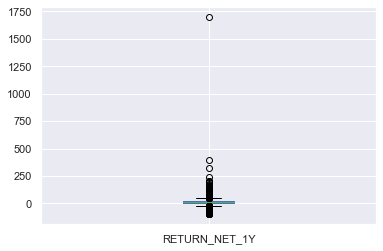

In [11]:
# strip leading and trailing white spaces from string columns
f_str = fund_1.select_dtypes(['object'])
fund_1[f_str.columns] = f_str.apply(lambda x: x.str.strip())
# reproduce boxplot without top outlier
fund_1[fund_1.SHARECLASS_ID != 'F0GBR06SU1'].boxplot(column='RETURN_NET_1Y', return_type='axes')

In [12]:
# evaluate boxplot excluding top two outliers 
mask = fund_1['SHARECLASS_ID'].isin(['F0GBR06SU1','F00000PQUZ'])
fund_1[~mask].boxplot(column='RETURN_NET_1Y', return_type='axes')

In [13]:
#remove outlier
#fund_1= fund_1[fund_1.SHARECLASS_ID != 'F0GBR06SU1']

In [14]:
#################### Evaluate file 2 #####################

fund_2.info()
fund_2["SHARECLASS_ID"].nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7061 entries, 0 to 7060
Data columns (total 12 columns):
SHARECLASS_ID      7061 non-null object
SHARECLASS_NAME    7061 non-null object
FUND_NAME          7061 non-null object
CATEGORY           7061 non-null object
SHARPE_RATIO_1Y    7061 non-null object
SHARPE_RATIO_3Y    7061 non-null object
SHARPE_RATIO_5Y    7061 non-null object
BETA_1Y            7061 non-null object
BETA_3Y            7061 non-null object
BETA_5Y            7061 non-null object
INFO_RATIO_3Y      7061 non-null object
INFO_RATIO_5Y      7061 non-null object
dtypes: object(12)
memory usage: 662.0+ KB


7061

In [15]:
fund_2.head()

SHARECLASS_ID  \
0  FVUSA04ADJ                       
1  FVUSA001AQ                       
2  F00000M8U5                       
3  F00000N9TF                       
4  F0000000IA                       

                                   SHARECLASS_NAME  \
0  1290 VT Socially Responsible Portfolio Class IA   
1  1290 VT Socially Responsible Portfolio Class IB   
2                 ABC-CA CSI 300 Index Equity Fund   
3                 ABC-CA CSI 500 Index Equity Fund   
4                    ABF Hong Kong Bond Index Fund   

                                FUND_NAME CATEGORY SHARPE_RATIO_1Y  \
0  1290 VT Socially Responsible Portfolio   Equity            4.92   
1  1290 VT Socially Responsible Portfolio   Equity            4.86   
2        ABC-CA CSI 300 Index Equity Fund   Equity            1.82   
3        ABC-CA CSI 500 Index Equity Fund   Equity            0.02   
4           ABF Hong Kong Bond Index Fund   Equity           -0.79   

  SHARPE_RATIO_3Y SHARPE_RATIO_5Y BETA_1Y BETA_3Y BETA_5Y INFO_RATIO_3Y  \
0            0.89            1.43    0.85    0.97    0.97         -0.78   
1            0.89            1.43    0.86    0.97    0.97         -0.78   
2            0.71            0.61    1.16    1.01    1.04          0.79   
3            0.38            0.59    0.87    0.88    0.94         -0.23   
4            0.21            0.04    0.84    0.86  <null>         -1.99   

  INFO_RATIO_5Y  
0      -0.40272  
1      -0.40147  
2       0.72641  
3       0.23188  
4        <null>

In [16]:
# convert numerical columns to float
cols = fund_2.columns[4:]
fund_2[cols]=fund_2[cols].apply(pd.to_numeric, errors='coerce')
# strip leading and lagging white space
f_str = fund_2.select_dtypes(['object'])
fund_2[f_str.columns] = f_str.apply(lambda x: x.str.strip())

In [17]:
fund_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7061 entries, 0 to 7060
Data columns (total 12 columns):
SHARECLASS_ID      7061 non-null object
SHARECLASS_NAME    7061 non-null object
FUND_NAME          7061 non-null object
CATEGORY           7061 non-null object
SHARPE_RATIO_1Y    7045 non-null float64
SHARPE_RATIO_3Y    7046 non-null float64
SHARPE_RATIO_5Y    7046 non-null float64
BETA_1Y            6910 non-null float64
BETA_3Y            5773 non-null float64
BETA_5Y            5766 non-null float64
INFO_RATIO_3Y      5773 non-null float64
INFO_RATIO_5Y      5766 non-null float64
dtypes: float64(8), object(4)
memory usage: 662.0+ KB


In [18]:
# show percentage of missing values
missing =(fund_2.isnull().sum(axis=0) /fund_2.shape[0]*100)
print((missing[missing.nonzero()[0]]).round(2).astype(str) + '%')

SHARPE_RATIO_1Y     0.23%
SHARPE_RATIO_3Y     0.21%
SHARPE_RATIO_5Y     0.21%
BETA_1Y             2.14%
BETA_3Y            18.24%
BETA_5Y            18.34%
INFO_RATIO_3Y      18.24%
INFO_RATIO_5Y      18.34%
dtype: object


/Users/brjax/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [19]:
fund_2.describe(include="all")

SHARECLASS_ID                      SHARECLASS_NAME  \
count           7061                                 7061   
unique          7061                                 7061   
top       F000003Y7F  Commerzbank ETN 3x DJIAF Daily Long   
freq               1                                    1   
mean             NaN                                  NaN   
std              NaN                                  NaN   
min              NaN                                  NaN   
25%              NaN                                  NaN   
50%              NaN                                  NaN   
75%              NaN                                  NaN   
max              NaN                                  NaN   

                                FUND_NAME CATEGORY  SHARPE_RATIO_1Y  \
count                                7061     7061      7045.000000   
unique                               4859        4              NaN   
top     ANZ Vanguard Australian Shr Index   Equity              NaN   
freq                                   16     3087              NaN   
mean                                  NaN      NaN         1.920338   
std                                   NaN      NaN         2.408002   
min                                   NaN      NaN       -20.330000   
25%                                   NaN      NaN         0.620000   
50%                                   NaN      NaN         1.880000   
75%                                   NaN      NaN         2.990000   
max                                   NaN      NaN        47.470000   

        SHARPE_RATIO_3Y  SHARPE_RATIO_5Y      BETA_1Y      BETA_3Y  \
count       7046.000000      7046.000000  6910.000000  5773.000000   
unique              NaN              NaN          NaN          NaN   
top                 NaN              NaN          NaN          NaN   
freq                NaN              NaN          NaN          NaN   
mean           0.721029         0.884699     0.015236     0.957897   
std            1.614906         1.245530    43.532130     7.495397   
min           -4.540000        -4.830000 -1948.270000  -184.510000   
25%            0.410000         0.530000     0.720000     0.800000   
50%            0.680000         0.900000     0.970000     0.970000   
75%            0.890000         1.240000     1.060000     1.020000   
max           26.000000        21.860000  1188.090000   209.470000   

            BETA_5Y  INFO_RATIO_3Y  INFO_RATIO_5Y  
count   5766.000000    5773.000000    5766.000000  
unique          NaN            NaN            NaN  
top             NaN            NaN            NaN  
freq            NaN            NaN            NaN  
mean       0.946596      -0.632581      -0.607171  
std        3.835798       2.877199       2.681916  
min      -77.290000     -64.180000     -65.163350  
25%        0.800000      -0.680000      -0.676992  
50%        0.980000      -0.150000      -0.161340  
75%        1.020000       0.230000       0.225187  
max       89.500000       4.800000       3.927860

In [20]:
# create flag/indicator column to identify suspicious betas
fund_2["beta_flag"] = np.where(np.abs(fund_2['BETA_1Y'])>=100,1,np.where(np.abs(fund_2['BETA_3Y'])>=100,1,
                                                                         np.where(np.abs(fund_2['BETA_5Y'])>=100,1,0)))
print(fund_2[fund_2.beta_flag == 1]['beta_flag'].sum())
fund_2[fund_2.beta_flag == 1]

31


SHARECLASS_ID                                    SHARECLASS_NAME  \
332     F0000045VC          Amundi ETF Short MSCI USA Daily UCITS ETF   
440     F000005PNV                         BMO India Equity Index ETF   
516     F000002942                     Bankinter Eurostoxx Inverso FI   
561     FOUSA06JHM    BetaPro Canadian Gold Miners -2x Daily Bear ETF   
562     FOUSA06JHL     BetaPro Canadian Gold Miners 2x Daily Bull ETF   
563     FOUSA06OMI               BetaPro Crude Oil -2x Daily Bear ETF   
564     FOUSA06OMH                BetaPro Crude Oil 2x Daily Bull ETF   
568     FOUSA06UU2               BetaPro NASDAQ-100 2x Daily Bull ETF   
574     F00000LNER  BetaPro S&P 500 VIX Short-Term Futures 2x Dail...   
575     F00000O2LH  BetaPro S&P 500 VIX Short-Term Futures Daily I...   
581     FOUSA06JHJ    BetaPro S&P/TSX Capped Energy 2x Daily Bull ETF   
584     F000003VFR                  BetaPro Silver -2x Daily Bear ETF   
585     F000003VFS                   BetaPro Silver 2x Daily Bull ETF   
1012    F00000PF1E             Commerzbank ETN -10x BUNDF Daily Short   
1013    F00000PCLP           Commerzbank ETN -10x SCHATZF Daily Short   
1015    F00000PVI6           Commerzbank ETN -15x SCHATZF Daily Short   
1023    F00000PT9C            Commerzbank ETN -1x TECDAXF Daily Short   
1055    F00000PKD0              Commerzbank ETN -5x BUNDF Daily Short   
1056    F00000PCOS            Commerzbank ETN -5x SCHATZF Daily Short   
2591    F00000O1VU  LGT Crown Managed Futures UCITS Sub-Fund - Cla...   
2718    F00000MG4G             Lyxor Daily Double Short BTP UCITS ETF   
2719    F00000HGTN            Lyxor Daily Double Short Bund UCITS ETF   
3102    FOUSA06TSA                Market Vectors Double Long Euro ETN   
3103    FOUSA06TSB               Market Vectors Double Short Euro ETN   
4155    FOUSA08MW9                               ProShares Ultra Euro   
4181    FOUSA08MWB                                ProShares Ultra Yen   
4227    FOUSA08MWC                           ProShares UltraShort Yen   
6074    F0GBR05TKJ                                      XACT Bear ETF   
6190    F000000R8L  db x-trackers II iTraxx Crossover Short Daily ...   
6306    F00000JNPO                    iPath US Treasury Steepener ETN   
6625    F000005PNG                            iShares India Index ETF   

                                              FUND_NAME      CATEGORY  \
332           Amundi ETF Short MSCI USA Daily UCITS ETF        Equity   
440                          BMO India Equity Index ETF        Equity   
516                      Bankinter Eurostoxx Inverso FI        Equity   
561     BetaPro Canadian Gold Miners -2x Daily Bear ETF        Equity   
562      BetaPro Canadian Gold Miners 2x Daily Bull ETF        Equity   
563                BetaPro Crude Oil -2x Daily Bear ETF        Equity   
564                 BetaPro Crude Oil 2x Daily Bull ETF        Equity   
568                BetaPro NASDAQ-100 2x Daily Bull ETF        Equity   
574   BetaPro S&P 500 VIX Short-Term Futures 2x Dail...        Equity   
575   BetaPro S&P 500 VIX Short-Term Futures Daily I...        Equity   
581     BetaPro S&P/TSX Capped Energy 2x Daily Bull ETF        Equity   
584                   BetaPro Silver -2x Daily Bear ETF        Equity   
585                    BetaPro Silver 2x Daily Bull ETF        Equity   
1012             Commerzbank ETN -10x BUNDF Daily Short        Equity   
1013           Commerzbank ETN -10x SCHATZF Daily Short        Equity   
1015           Commerzbank ETN -15x SCHATZF Daily Short        Equity   
1023            Commerzbank ETN -1x TECDAXF Daily Short        Equity   
1055              Commerzbank ETN -5x BUNDF Daily Short        Equity   
1056            Commerzbank ETN -5x SCHATZF Daily Short        Equity   
2591           LGT Crown Managed Futures UCITS Sub-Fund        Equity   
2718             Lyxor Daily Double Short BTP UCITS ETF        Equity   
2719            Lyxor Daily Double Short Bund UCITS ETF       

In [21]:
# identify additional fund listings in dataset 2 (not included in dataset 1)
extra = list(set(fund_2["SHARECLASS_ID"])-set(fund_1["SHARECLASS_ID"]))
mask = fund_2['SHARECLASS_ID'].isin(extra)
fund_2[mask]


SHARECLASS_ID                                    SHARECLASS_NAME  \
16    F000005PCP  Aegon International Emerging Markets Equity Tr...   
17    F000005PCQ  Aegon International Emerging Markets Equity Tr...   

                                            FUND_NAME CATEGORY  \
16  AEGON International Emerging Markets Equity Tr...   Equity   
17  AEGON International Emerging Markets Equity Tr...   Equity   

    SHARPE_RATIO_1Y  SHARPE_RATIO_3Y  SHARPE_RATIO_5Y  BETA_1Y  BETA_3Y  \
16             0.86             0.64             0.51     1.16     0.84   
17             0.91             0.67             0.54     1.14     0.81   

    BETA_5Y  INFO_RATIO_3Y  INFO_RATIO_5Y  beta_flag  
16     0.87           0.41        0.28370          0  
17     0.85           0.44        0.32374          0

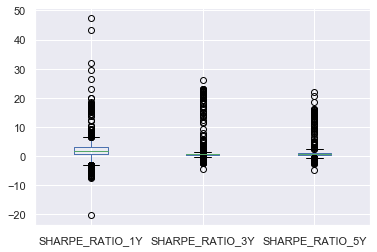

In [22]:
fund_2.boxplot(column=['SHARPE_RATIO_1Y','SHARPE_RATIO_3Y','SHARPE_RATIO_5Y'], return_type='axes')

In [23]:
cols =['SHARECLASS_ID','SHARECLASS_NAME','SHARPE_RATIO_1Y','SHARPE_RATIO_3Y','SHARPE_RATIO_5Y']
fund_2[cols].sort_values(by='SHARPE_RATIO_1Y', ascending=False).head(10)

SHARECLASS_ID                                    SHARECLASS_NAME  \
1917    F00000NZWX                           GF SZSE 100 Index Fund A   
6028    F00000OHVT  WanJia CSI Innovative & Growing Enterprises In...   
2312    F00000OQSB      ICBCCS Ruizhi SZSE 100 Index ClassifiedFund A   
775     F00000NAQZ       ChangSheng TongRui CSI 200 Classified Fund A   
2590    F00000OMQ1  LACAM SZSE 300 Index Classified Fund-Steady In...   
3095    F00000N8QH                            Manulife TEDAStableFund   
6122    F00000NZD1      Zheshang CSI 300 Index Structured Fund Stable   
1925    F00000ITEN  GTJA Allianz ShuangXi Classified CSI 100 Index...   
5264    F00000N583  TOP RENDA FIXA MIX CRDITO PRIVADO LONGO PRAZO ...   
2392    F00000N66R  ITA RENDA FIXA CRDITO PRIVADO MASTER ACTIVE FI...   

      SHARPE_RATIO_1Y  SHARPE_RATIO_3Y  SHARPE_RATIO_5Y  
1917            47.47            16.66             8.01  
6028            43.12            16.12            12.69  
2312            31.86             3.01             3.13  
775             29.55            16.77            18.65  
2590            26.40            14.83             3.18  
3095            22.89            26.00            21.86  
6122            20.03            17.87             9.28  
1925            19.92            22.12            20.79  
5264            18.64            23.15            16.25  
2392            18.28            22.85            16.30

In [24]:
fund_2.boxplot(column=['INFO_RATIO_3Y','INFO_RATIO_5Y'], return_type='axes')

In [25]:
cols =['SHARECLASS_ID','SHARECLASS_NAME','INFO_RATIO_3Y','INFO_RATIO_5Y','SHARPE_RATIO_3Y','SHARPE_RATIO_5Y']
fund_2[cols].sort_values(by='INFO_RATIO_3Y').head()

SHARECLASS_ID                                    SHARECLASS_NAME  \
4953    F000002QV6                      Source Russell 2000 UCITS ETF   
767     F0CAN05MIT             Canada Life Index Cdn Equity (TD) Gens   
387     F00000WPNF                  SSQ BlackRock Can Index GIF Basic   
656     F0CAN05NYR              CDSPI TSX Composite Index (BlackRock)   
2781    F0000026NB  Lyxor MSCI AC Asia-Pacific ex Japan UCITS ETF USD   

      INFO_RATIO_3Y  INFO_RATIO_5Y  SHARPE_RATIO_3Y  SHARPE_RATIO_5Y  
4953         -64.18      -65.16335             0.69             0.99  
767          -53.69      -47.95824             0.40             0.69  
387          -53.60      -49.94717             0.40             0.69  
656          -44.83      -40.22867             0.67             0.95  
2781         -42.80      -25.29657             0.46             0.51

In [26]:
# evaluate whether quantile filter reduces outliers
display(fund_2.quantile([.01,.99]))
display(fund_2.describe().loc[['min','max']])

SHARPE_RATIO_1Y  SHARPE_RATIO_3Y  SHARPE_RATIO_5Y  BETA_1Y  BETA_3Y  \
0.01          -4.0400           -1.260          -1.5400  -3.7946  -3.6396   
0.99           7.3536            2.731           2.2405   5.2200   5.4528   

      BETA_5Y  INFO_RATIO_3Y  INFO_RATIO_5Y  beta_flag  
0.01  -3.4835       -12.4356     -10.759165        0.0  
0.99   5.3470         1.3400       1.318746        0.0

SHARPE_RATIO_1Y  SHARPE_RATIO_3Y  SHARPE_RATIO_5Y  BETA_1Y  BETA_3Y  \
min           -20.33            -4.54            -4.83 -1948.27  -184.51   
max            47.47            26.00            21.86  1188.09   209.47   

     BETA_5Y  INFO_RATIO_3Y  INFO_RATIO_5Y  beta_flag  
min   -77.29         -64.18      -65.16335        0.0  
max    89.50           4.80        3.92786        1.0

In [27]:
# merge dataframes
fund_mrg= pd.merge(fund_1, fund_2, how='inner', left_on=['SHARECLASS_ID','SHARECLASS_NAME','FUND_NAME'],\
                   right_on=['SHARECLASS_ID','SHARECLASS_NAME','FUND_NAME'])
fund_mrg.head()

SHARECLASS_ID                                  SHARECLASS_NAME  \
0    FVUSA04ADJ  1290 VT Socially Responsible Portfolio Class IA   
1    FVUSA001AQ  1290 VT Socially Responsible Portfolio Class IB   
2    F00000M8U5                 ABC-CA CSI 300 Index Equity Fund   
3    F00000N9TF                 ABC-CA CSI 500 Index Equity Fund   
4    F0000000IA                    ABF Hong Kong Bond Index Fund   

                                FUND_NAME  SHARE_CLASS_COUNTER  \
0  1290 VT Socially Responsible Portfolio                    1   
1  1290 VT Socially Responsible Portfolio                    2   
2        ABC-CA CSI 300 Index Equity Fund                    1   
3        ABC-CA CSI 500 Index Equity Fund                    1   
4           ABF Hong Kong Bond Index Fund                    1   

       FUND_FAMILY_NAME MSTAR_CATEGORY_NAME    MSTAR_GLOB_CATEGORY_NAME  \
0         AXA Equitable         Large Blend  US Equity Large Cap Growth   
1         AXA Equitable         Large Blend  US Equity Large Cap Growth   
2  ABC-CA Fund Mgmt Co.        Equity Funds        Greater China Equity   
3  ABC-CA Fund Mgmt Co.        Equity Funds        Greater China Equity   
4  HSBC Investment Fund            HKD Bond           Asia Fixed Income   

  MSTAR_BROAD_CATEGORY COMMON_SOURCE_SYSTEM  RETURN_NET_1M  ...  CATEGORY  \
0               Equity               FO_USA           2.32  ...    Equity   
1               Equity               FO_USA           2.36  ...    Equity   
2               Equity         ASIA-PACIFIC           4.04  ...    Equity   
3               Equity         ASIA-PACIFIC          -0.72  ...    Equity   
4         Fixed Income               FE_ALL          -0.50  ...    Equity   

   SHARPE_RATIO_1Y  SHARPE_RATIO_3Y  SHARPE_RATIO_5Y  BETA_1Y  BETA_3Y  \
0             4.92             0.89             1.43     0.85     0.97   
1             4.86             0.89             1.43     0.86     0.97   
2             1.82             0.71             0.61     1.16     1.01   
3             0.02             0.38             0.59     0.87     0.88   
4            -0.79             0.21             0.04     0.84     0.86   

   BETA_5Y  INFO_RATIO_3Y INFO_RATIO_5Y  beta_flag  
0     0.97          -0.78      -0.40272          0  
1     0.97          -0.78      -0.40147          0  
2     1.04           0.79       0.72641          0  
3     0.94          -0.23       0.23188          0  
4      NaN          -1.99           NaN          0  

[5 rows x 28 columns]

In [28]:
# add additional flags for beta values that exceed the hueristic of relative volatilities--see data quality report

fund_mrg["vol_temp"]= np.abs(fund_mrg["RETURN_NET_1Y"]/fund_mrg['SHARPE_RATIO_1Y'])\
                      + 2/np.abs(fund_mrg['SHARPE_RATIO_1Y'])
fund_mrg["beta_flag"] = np.where(np.abs(fund_mrg['BETA_1Y'])>fund_mrg["vol_temp"],1,fund_mrg["beta_flag"])
fund_mrg.drop(columns=['vol_temp'], inplace=True)
print(fund_mrg[fund_mrg.beta_flag == 1]['beta_flag'].sum())
#fund_mrg[fund_mrg.beta_flag == 1]

113


In [29]:
# filter data to the range between .01 and .99 quantiles
cols = fund_2.columns[4:]
q_01 =fund_mrg[cols].quantile(.01)
q_99 =fund_mrg[cols].quantile(.99)
temp= fund_mrg[fund_mrg[cols].gt(q_01) & fund_mrg[cols].lt(q_99)]
idx = np.where(temp[cols[0]].notnull())[0]
for col in cols[1:-1]:
    tmp = np.where(temp[col].notnull())[0]
    idx = np.intersect1d(idx,tmp) 
# drop data outside quantile range
fund_fin = fund_mrg.iloc[idx]
idx = np.where(fund_fin["beta_flag"]==0)[0]
fund_fin= fund_fin.iloc[idx]
# drop data with suspicious beta flag
fund_fin.drop(columns=['beta_flag','CATEGORY'], inplace=True)
print(fund_fin.shape)


(5337, 26)


In [30]:
# save to file
#fund_fin.to_csv(p/'data_mstar.csv', index = None, header=True) 

In [31]:
fund_fin.describe()

SHARE_CLASS_COUNTER  RETURN_NET_1M  RETURN_NET_2M  RETURN_NET_3M  \
count          5337.000000    5337.000000    5337.000000    5337.000000   
mean              1.742739       2.181482       3.579104       3.993541   
std               1.516018       3.223461       5.519825       5.387291   
min               1.000000     -29.150000     -38.670000     -41.070000   
25%               1.000000       0.660000       0.700000       1.470000   
50%               1.000000       1.990000       3.730000       4.110000   
75%               2.000000       3.500000       6.000000       5.990000   
max              16.000000      34.090000      78.090000      80.760000   

       RETURN_NET_6M  RETURN_NET_1Y  RETURN_NET_2Y  RETURN_NET_3Y  \
count    5337.000000    5337.000000    5337.000000    5337.000000   
mean        6.514780      15.610624       8.497517       6.343213   
std         8.948214      17.406609      10.465184       8.756283   
min       -59.280000     -82.890000     -72.450000     -82.390000   
25%         1.640000       5.500000       3.630000       3.050000   
50%         6.080000      16.860000       9.100000       7.280000   
75%        10.340000      23.750000      13.230000      10.330000   
max        93.990000     397.410000      95.080000      48.710000   

       RETURN_NET_4Y  RETURN_NET_5Y  SHARPE_RATIO_1Y  SHARPE_RATIO_3Y  \
count    5337.000000    5337.000000      5337.000000      5337.000000   
mean        6.854980       8.844557         1.947291         0.617043   
std         8.576586       9.675286         1.735643         0.404531   
min       -78.020000     -71.450000        -3.920000        -1.240000   
25%         3.730000       4.250000         0.710000         0.420000   
50%         7.560000       9.850000         1.880000         0.680000   
75%        11.330000      14.370000         2.970000         0.880000   
max        80.370000      59.970000         7.320000         1.990000   

       SHARPE_RATIO_5Y      BETA_1Y      BETA_3Y      BETA_5Y  INFO_RATIO_3Y  \
count      5337.000000  5337.000000  5337.000000  5337.000000    5337.000000   
mean          0.849874     0.868220     0.911192     0.914577      -0.409344   
std           0.531360     0.711284     0.572444     0.553349       1.306832   
min          -1.520000    -3.640000    -3.590000    -3.480000     -12.360000   
25%           0.550000     0.720000     0.820000     0.810000      -0.640000   
50%           0.920000     0.960000     0.970000     0.980000      -0.140000   
75%           1.250000     1.060000     1.020000     1.020000       0.220000   
max           2.180000     5.060000     5.450000     4.960000       1.300000   

       INFO_RATIO_5Y  
count    5337.000000  
mean       -0.403767  
std         1.236396  
min       -10.748220  
25%        -0.634520  
50%        -0.146350  
75%         0.218030  
max         1.318690

In [32]:
# show what percentage of each asset class was maintained in the final dataset
orig = fund_mrg.groupby("MSTAR_BROAD_CATEGORY")["SHARECLASS_ID"].count()
fin = fund_fin.groupby("MSTAR_BROAD_CATEGORY")["SHARECLASS_ID"].count()
print((fin/orig*100).round(2).astype(str) + '%')
fund_fin.columns

MSTAR_BROAD_CATEGORY
Allocation      97.47%
Alternative     54.07%
Equity          77.35%
Fixed Income    77.11%
Name: SHARECLASS_ID, dtype: object


Index(['SHARECLASS_ID', 'SHARECLASS_NAME', 'FUND_NAME', 'SHARE_CLASS_COUNTER',
       'FUND_FAMILY_NAME', 'MSTAR_CATEGORY_NAME', 'MSTAR_GLOB_CATEGORY_NAME',
       'MSTAR_BROAD_CATEGORY', 'COMMON_SOURCE_SYSTEM', 'RETURN_NET_1M',
       'RETURN_NET_2M', 'RETURN_NET_3M', 'RETURN_NET_6M', 'RETURN_NET_1Y',
       'RETURN_NET_2Y', 'RETURN_NET_3Y', 'RETURN_NET_4Y', 'RETURN_NET_5Y',
       'SHARPE_RATIO_1Y', 'SHARPE_RATIO_3Y', 'SHARPE_RATIO_5Y', 'BETA_1Y',
       'BETA_3Y', 'BETA_5Y', 'INFO_RATIO_3Y', 'INFO_RATIO_5Y'],
      dtype='object')

<a id="sql_db"></a>

## Create SQL Database

In [33]:
#################### create SQL #####################

import sqlite3
sqlite3.connect('MstarDB.db')

conn = sqlite3.connect('MstarDB.db')  
c = conn.cursor()


In [34]:
c.execute('''CREATE TABLE FUND_INFO
             ([id] INTEGER PRIMARY KEY,
             [SHARECLASS_ID] text,
             [SHARECLASS_NAME] text,
             [FUND_NAME] text,
             [FUND_FAMILY_NAME] text,
             [MSTAR_CATEGORY_NAME] text, 
             [MSTAR_GLOB_CATEGORY_NAME] text, 
             [MSTAR_BROAD_CATEGORY] text,
             [COMMON_SOURCE_SYSTEM] text,  
             [SHARE_CLASS_COUNTER] integer 
             )''')

c.execute('''CREATE TABLE FUND_METRICS
             ([id] INTEGER PRIMARY KEY,
             [SHARECLASS_ID] integer,
             [FUND_NAME] text,
             [RETURN_NET_1M] real,
             [RETURN_NET_2M] real, 
             [RETURN_NET_3M] real, 
             [RETURN_NET_6M] real, 
             [RETURN_NET_1Y] real, 
             [RETURN_NET_2Y] real, 
             [RETURN_NET_3Y] real, 
             [RETURN_NET_4Y] real,
             [RETURN_NET_5Y] real,
             [SHARPE_RATIO_1Y] real,
             [SHARPE_RATIO_3Y] real,
             [SHARPE_RATIO_5Y] real,
             [BETA_1Y] real,
             [BETA_3Y] real,
             [BETA_5Y] real, 
             [INFO_RATIO_3Y] real,
             [INFO_RATIO_5Y] real, 
             [Date] date
             )''')
conn.commit()

In [35]:
# add date colume to dataframe
fund_fin["Date"]=pd.Timestamp('2017-10-31')


In [36]:
# filter data for the first table and add to database
cols = fund_fin.columns[:9]
fund_if = fund_fin[cols]
fund_if.to_sql('FUND_INFO', conn, if_exists='append', index = False)

In [37]:
# filter data for the second table and add to database
cols = fund_fin.columns[9:]
cols = cols.append(pd.Index(["SHARECLASS_ID","FUND_NAME"]))
fund_mt = fund_fin[cols]
fund_mt.head()
fund_mt.to_sql('FUND_METRICS', conn, if_exists='append', index = False)


In [38]:
conn.commit()

<a id="sql_query"></a>

## SQL Query- 5Y IR based on share count by fund name

In [39]:
###Query to return average of 5y IR where shareclass by fund name >1
avg_IR = pd.read_sql_query("""
SELECT FUND_INFO.SHARECLASS_ID, FUND_INFO.FUND_NAME, FUND_INFO.SHARE_CLASS_COUNTER, FUND_METRICS.INFO_RATIO_5Y
            FROM FUND_INFO
            INNER JOIN FUND_METRICS
            ON FUND_INFO.SHARECLASS_ID = FUND_METRICS.SHARECLASS_ID 
            WHERE FUND_INFO.FUND_NAME IN 
            (SELECT FUND_NAME
            FROM (SELECT FUND_NAME, count(distinct SHARECLASS_ID) as count
                FROM FUND_METRICS
                GROUP BY FUND_NAME
                HAVING count >1))
""",conn).mean()["INFO_RATIO_5Y"]
print(f'Average of 5Y Information Ratio: {avg_IR:.4f}')


Average of 5Y Information Ratio: -0.5718


In [40]:
conn.close()
